In [ ]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [17]:
import numpy as np
data=pd.read_csv("news_share_data.csv")

In [18]:
data.shape

(1003, 22)

In [32]:
data.head(15)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/2014 0:00,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/2014 0:00,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/2014 0:00,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,4/1/2014 0:00,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,4/1/2014 0:00,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000
5,7033985,Apple to Begin iPhone 6 Screen Production in M...,Whispers surrounding a possible iPhone 6 relea...,4/1/2014 0:00,0.494269,8,1,0,4.360679,4,Business,3343.790,4817.692,3974.216,31625.000,0.567866,0.098980,0.038190,0.024045,0.666667,-0.333330,1600
6,7014312,"Apple Updates iWork for OS X, iOS and iCloud","Apple updated its iWork suite Tuesday, adding ...",4/1/2014 0:00,0.639706,4,1,0,4.594444,7,Lifestyle,2499.333,5549.418,3667.217,4800.000,0.347222,0.186111,0.033333,0.005556,0.000000,0.000000,1300
7,3299703,Spare Your Facebook Friends From These 9 April...,Everybody's a comedian -- at least they think ...,4/1/2014 0:00,0.508511,26,8,0,4.713427,7,Tech,3030.861,4622.544,3761.262,3700.000,0.484539,0.134520,0.050100,0.026052,0.400000,-0.150000,2000
8,7014271,Why Tech Takes April Fools' Day So Seriously,Tech journalists hate April Fools' Day. Not be...,4/1/2014 0:00,0.481013,9,3,1,4.374613,8,Lifestyle,0.000,6813.466,3745.055,11800.000,0.533060,0.186324,0.046440,0.021672,0.066667,0.033333,2100
9,7008095,Atlanta Is World's Busiest Airport With 94 Mil...,Atlanta's Hartsfield-Jackson airport remained ...,4/1/2014 0:00,0.422028,11,1,0,4.272043,5,Business,3343.790,5585.617,4111.006,2600.000,0.502861,0.121931,0.043011,0.018280,0.357143,0.000000,1100


In [20]:
data.tail(15)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
988,7003199,Rolex: How a 109-Year-Old Brand Thrives in the...,"Last year, the decision makers at Rolex(Opens ...",4/17/2014 0:00,0.443756,20,4,2,4.592561,5,00000,0.000,3610.125,2045.425,1088.0,0.477455,0.007809,0.023356,0.021626,1.000000,-0.500000,1100
989,7021881,"It's Like RunKeeper, But for People Who Don't Run",RunKeeper is targeting non-athletes with its n...,4/17/2014 0:00,0.436877,44,6,0,4.390185,10,Entertainment,0.000,8345.793,5003.394,0.0,0.487242,0.105819,0.038616,0.014481,0.000000,0.000000,28200
990,6641407,"Yep, That's Rupert Murdoch Wearing an Oculus Rift",Your eyes are not deceiving you. Even Rupert M...,4/17/2014 0:00,0.450000,24,10,0,4.379747,8,Tech,2476.683,4338.257,3202.127,26800.0,0.527937,0.239264,0.066908,0.010850,0.388889,0.069444,1800
991,4992632,3 Pro-Russian Protesters Die in Firefight With...,Three pro-Russian protesters are dead and 13 a...,4/17/2014 0:00,0.594203,24,18,4,5.349030,6,00000,3610.125,52101.420,13073.360,2000.0,0.496154,0.217308,0.019391,0.011080,0.900000,0.100000,702
992,7023018,Firefighters Battle Boredom With Hose Hovercraft,The typical day of a firefighter includes the ...,4/17/2014 0:00,0.656977,2,0,1,4.242938,6,Entertainment,969.800,5291.092,3099.948,1091.5,0.321134,0.167677,0.033898,0.005650,0.616667,0.425000,873
993,7003169,"Ironically, Anonymous App Secret Is Hatching I...","On anonymous social media app Secret, you can ...",4/17/2014 0:00,0.477778,4,0,2,4.691646,5,Tech,3016.262,18851.050,6554.751,210300.0,0.432624,0.161028,0.035627,0.009828,0.562500,0.250000,2600
994,7022961,Snowden Asks Putin on Live TV If He Spies on R...,In what could be best described as a bizarre P...,4/17/2014 0:00,0.685841,4,0,2,4.391304,7,Entertainment,0.000,4123.765,2033.248,14750.0,0.335245,0.000216,0.021739,0.013043,0.000000,0.000000,851
995,7022974,You Can Now Invest in Your Neighbors' Solar En...,Here's another reason to be nice to the neighb...,4/17/2014 0:00,0.532637,6,12,0,4.380102,9,Tech,0.000,3764.693,1898.138,1100.0,0.477043,0.262305,0.058673,0.010204,0.000000,0.000000,3100
996,7003123,Captain of Sunken South Korea Ferry: 'I'm Sorry',"Lee Joon Suk, captain of the South Korean ferr...",4/17/2014 0:00,0.000000,0,21,0,0.000000,10,00000,0.000,8345.793,4746.031,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5800
997,7022926,30 'Star Wars' Facts You Didn't Know,"Learn something, you will.\n\nIn celebration o...",4/17/2014 0:00,0.468652,17,3,0,5.026398,7,00000,1579.216,3610.125,2617.292,7587.5,0.459514,0.062166,0.023292,0.010870,0.200000,0.200000,2500


In [21]:
data.describe()

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,0.526890,11.720837,5.188435,1.215354,4.603757,7.206381,1131.437972,6463.258234,3359.478830,13518.302031,0.446724,0.106187,0.038169,0.017772,0.292537,0.057536,4247.304088
std,4.823885e+05,0.118793,15.181597,8.495002,4.079730,0.701756,1.856713,1181.134621,7455.421154,1467.674637,51499.106509,0.109167,0.092496,0.015673,0.010557,0.325227,0.266609,22609.634435
min,2.195051e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,7.006102e+06,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,7.013065e+06,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,7.027570e+06,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,7.041291e+06,0.867925,162.000000,84.000000,51.000000,7.218430,10.000000,3613.040000,102200.000000,17604.270000,663600.000000,0.875000,0.489623,0.120805,0.103030,1.000000,1.000000,663600.000000


In [22]:
df = data.copy()

In [23]:
df.isnull().sum()

article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64

In [24]:
df.dtypes

article_id                      int64
title                          object
text                           object
published_date                 object
unique_tokens_rate            float64
num_hrefs                       int64
num_imgs                        int64
num_videos                      int64
average_token_length          float64
num_keywords                    int64
data_channel                   object
min_avg_key                   float64
max_avg_key                   float64
avg_avg_key                   float64
href_avg_shares               float64
global_subjectivity           float64
global_sentiment_polarity     float64
global_rate_positive_words    float64
global_rate_negative_words    float64
title_subjectivity            float64
title_sentiment_polarity      float64
shares                          int64
dtype: object

In [43]:
# Count the number of unique values in the 'data_channel' column
num_data_channels = df['data_channel'].nunique()

# Display the unique values in the 'data_channel' column
data_channel_values = df['data_channel'].unique()

# Print the results
print("Number of unique data channels:", num_data_channels)
print("Unique data channels:", data_channel_values)


Number of unique data channels: 6
Unique data channels: ['Business' 'Tech' '00000' 'Lifestyle' 'Entertainment' 'Social Media']


In [45]:
# Find the row with the highest shares
highest_share_row = df[df['shares'] == df['shares'].max()]

# Find the row with the lowest shares
lowest_share_row = df[df['shares'] == df['shares'].min()]

# Concatenate the two rows into a single DataFrame for easy comparison
result_df = pd.concat([highest_share_row, lowest_share_row])

# Display the result
print(result_df[['data_channel', 'shares']])


      data_channel  shares
516           Tech  663600
639  Entertainment      58


# Distribution

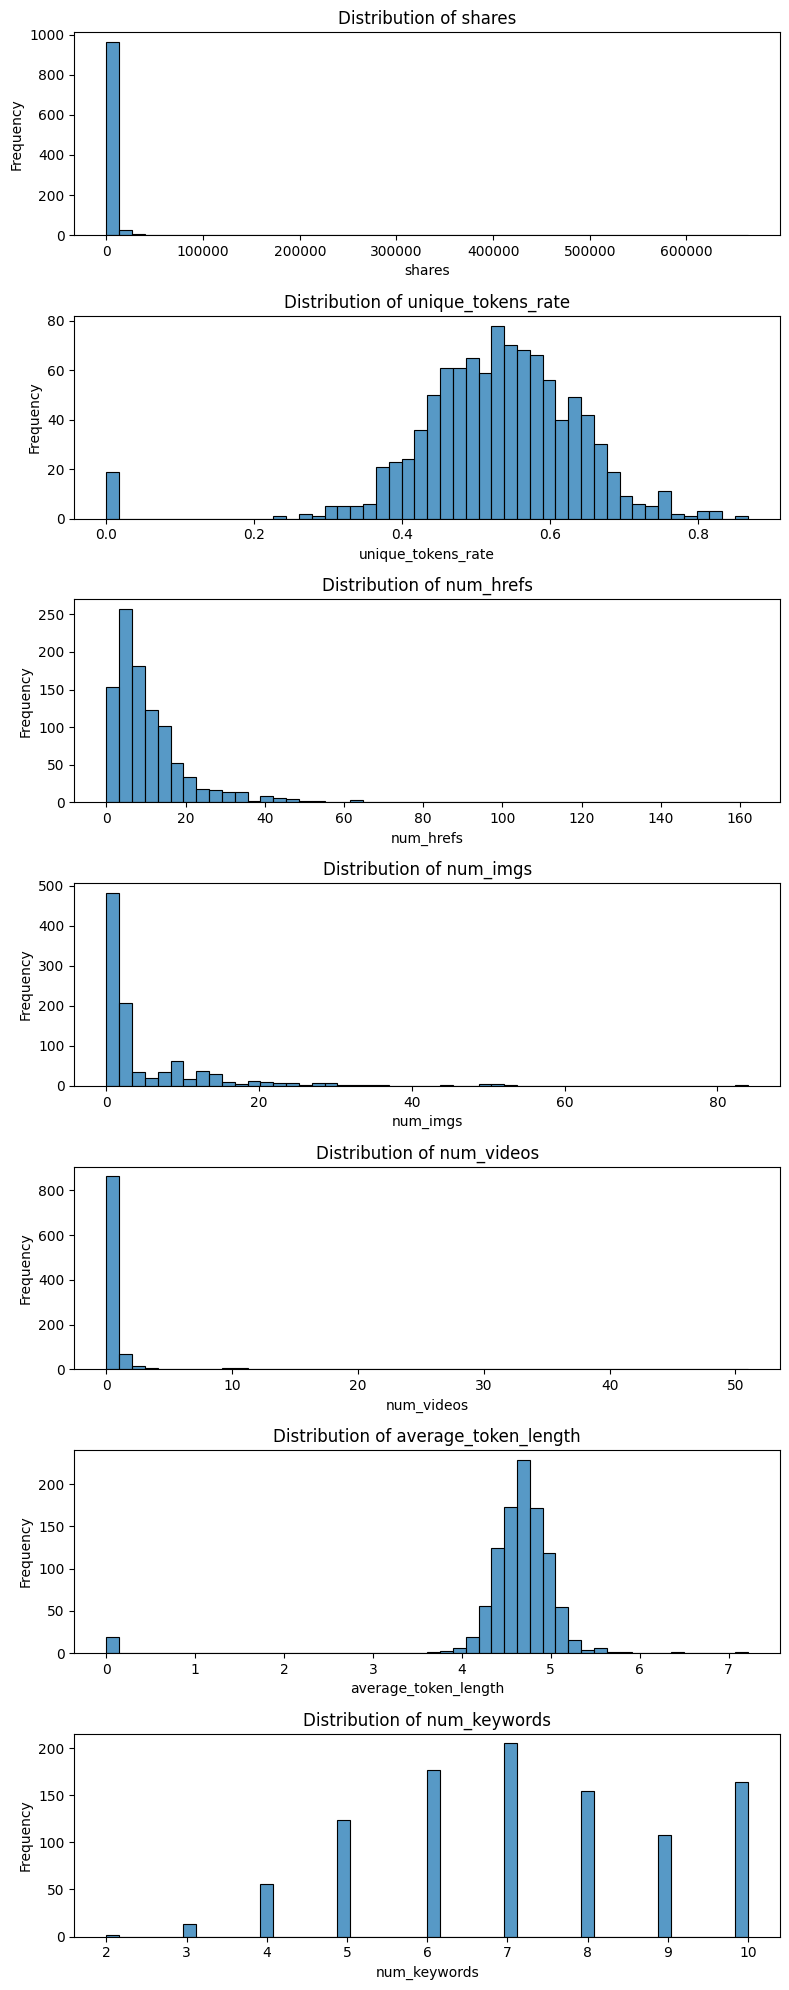

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['shares', 'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords']

# Plotting distributions
fig, axes = plt.subplots(len(features_to_plot), figsize=(8, 20))
for i, feature in enumerate(features_to_plot):
    sns.histplot(df[feature], bins=50, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()


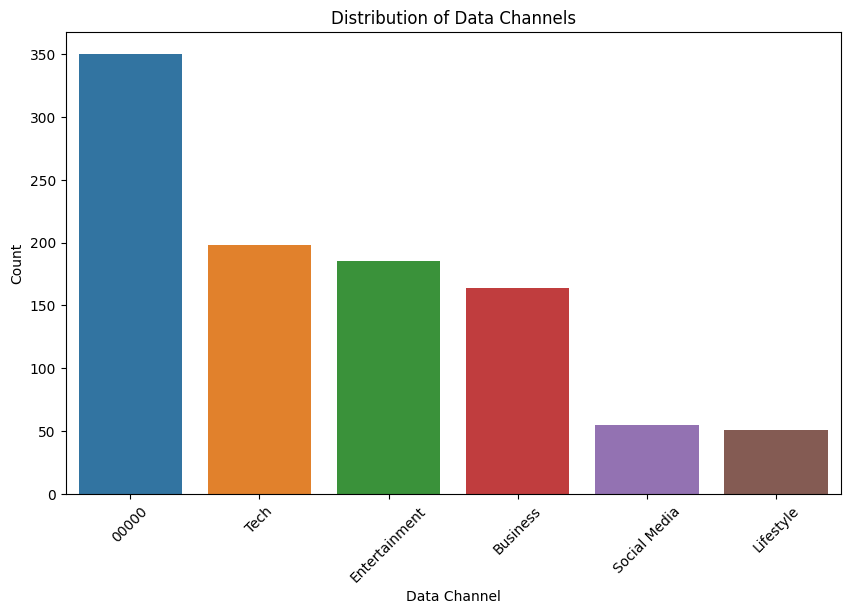

In [48]:


# Count the occurrences of each data channel
data_channel_counts = df['data_channel'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='data_channel', data=df, order=data_channel_counts.index)
plt.title('Distribution of Data Channels')
plt.xlabel('Data Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


## Distribution of channel and share

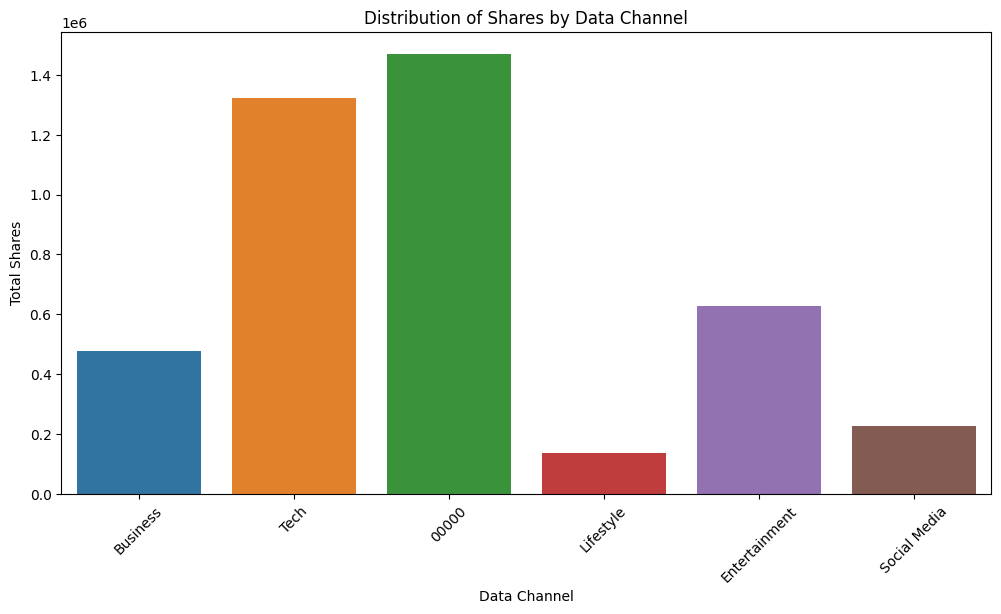

    Data Channel  Total Shares
0          00000       1469636
1       Business        477612
2  Entertainment        627047
3      Lifestyle        135164
4   Social Media        227536
5           Tech       1323051


In [74]:

# Bar plot of shares by data channel
plt.figure(figsize=(12, 6))
sns.barplot(x='data_channel', y='shares', data=df, estimator=sum, ci=None)
plt.title('Distribution of Shares by Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Total Shares')
plt.xticks(rotation=45)
plt.show()
channel_shares = df.groupby('data_channel')['shares'].sum().reset_index()
channel_shares.columns = ['Data Channel', 'Total Shares']

print(channel_shares)


## Distribution of Share and num_videos , num_img,num_hrefs , num_keywords

Table: Total for Features with Threshold 1000
       Features  shares
0     num_hrefs    9234
3  num_keywords    5605
1      num_imgs    4151
2    num_videos     909


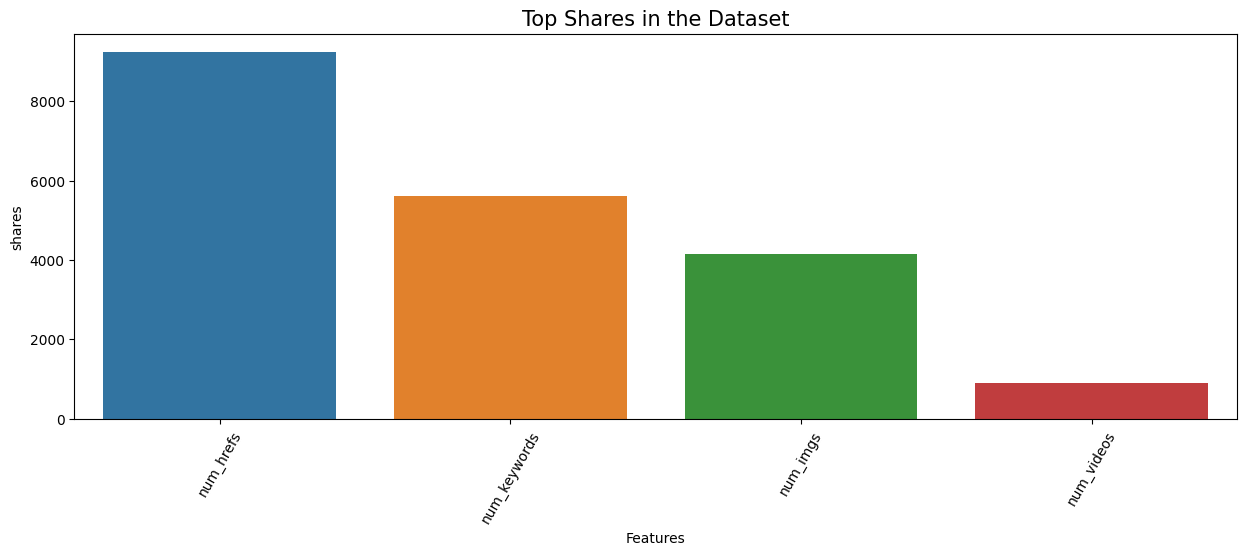

In [69]:
# Selecting threshold for shares
shares_threshold = 1000

# Selecting columns for analysis
columns_to_analyze = ['num_hrefs', 'num_imgs', 'num_videos', 'num_keywords']

# Filtering rows based on threshold
temp_shares = df[df['shares'] >= shares_threshold][columns_to_analyze].sum().reset_index()
temp_shares.rename(columns={'index': 'Features', 0: 'shares'}, inplace=True)
temp_shares = temp_shares.sort_values(by='shares', ascending=False)

# Display the table
print("Table: Total for Features with Threshold", shares_threshold)
print(temp_shares)

# Plotting bar chart
plt.figure(figsize=(15, 5))
sns.barplot(x=temp_shares['Features'], y=temp_shares['shares'])
plt.title(f"Top Shares in the Dataset", size=15)
plt.xticks(rotation=60)
plt.show()


# Boxplots

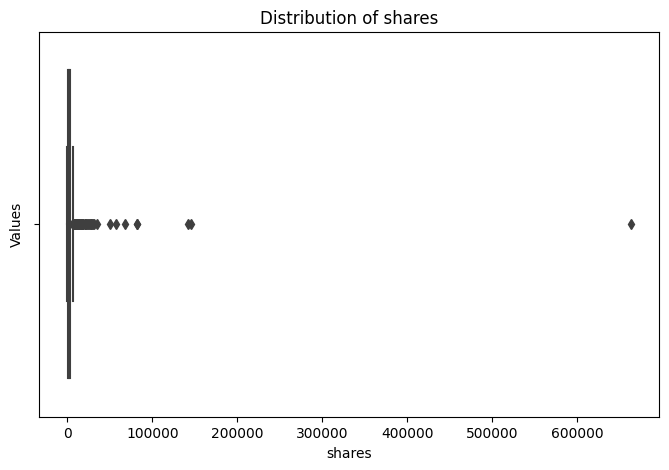

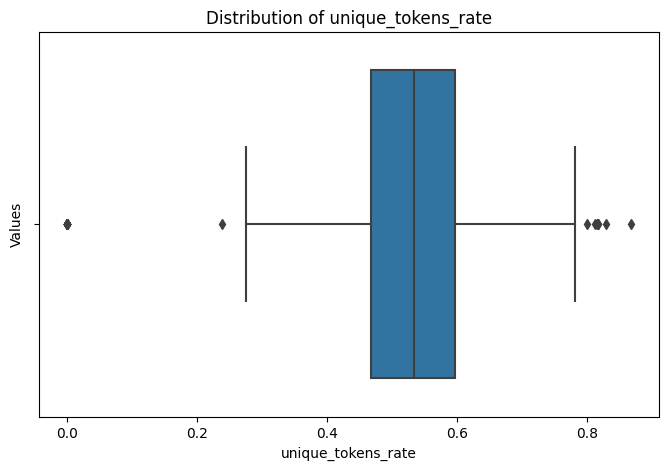

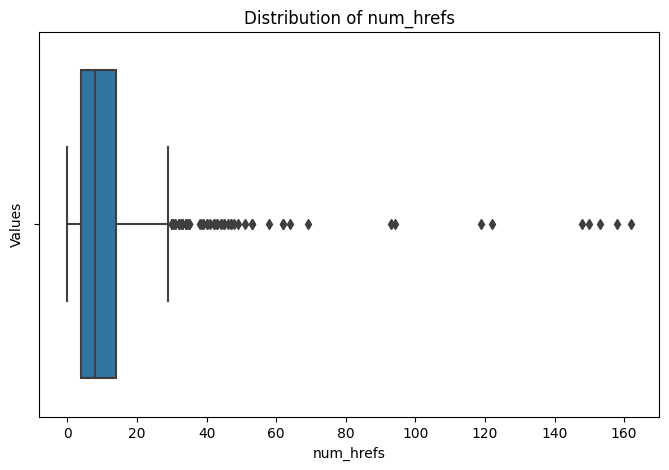

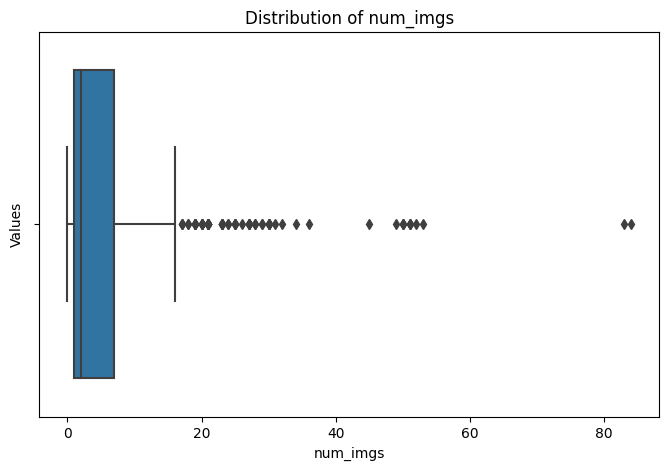

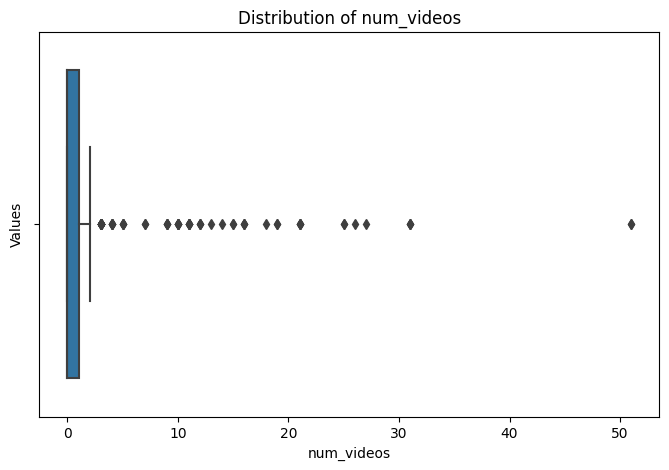

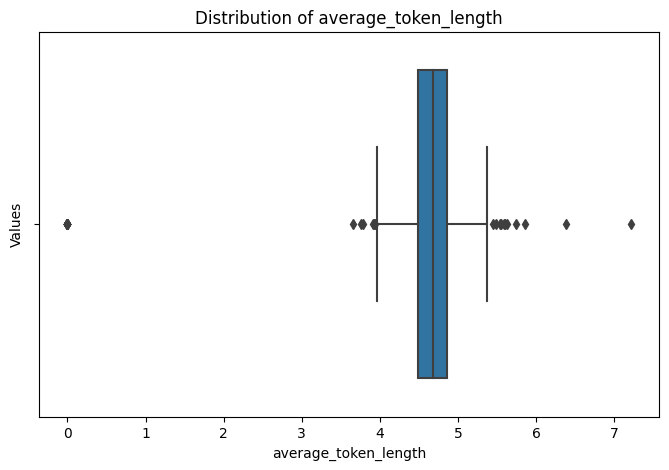

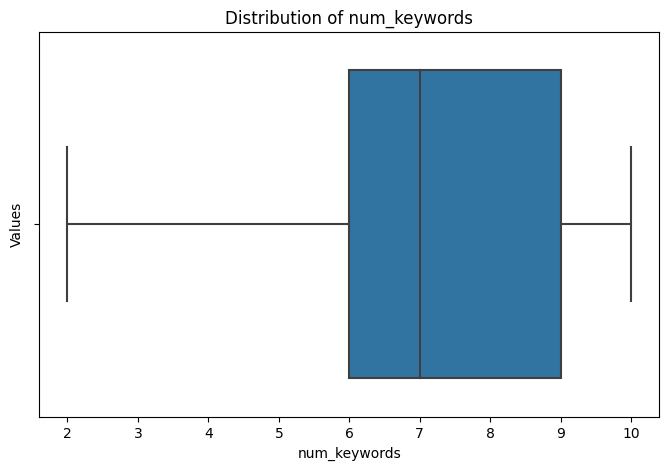

In [55]:

# Select the columns for individual boxplots
data_channel_counts = df['data_channel'].value_counts()
selected_columns = ['shares', 'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords']

# Plotting individual boxplots
for column in selected_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


# Scatter plot

## Shares Vs Data Channel

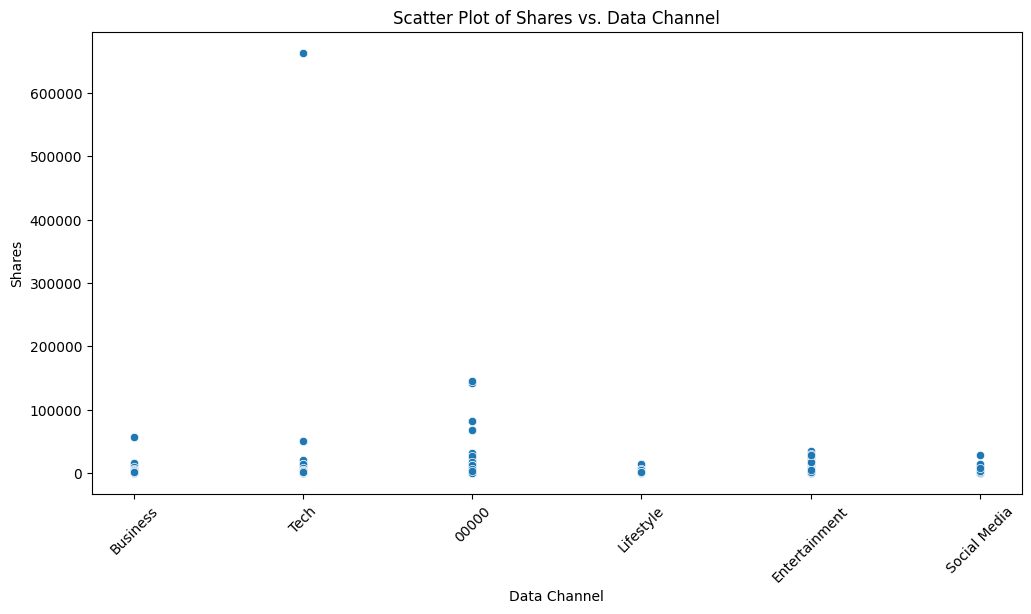

In [77]:

# Scatter plot of shares vs. data channel
plt.figure(figsize=(12, 6))
sns.scatterplot(x='data_channel', y='shares', data=df)
plt.title('Scatter Plot of Shares vs. Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Shares')
plt.xticks(rotation=45)
plt.show()


## Share vs num_videos , num_img , num_href

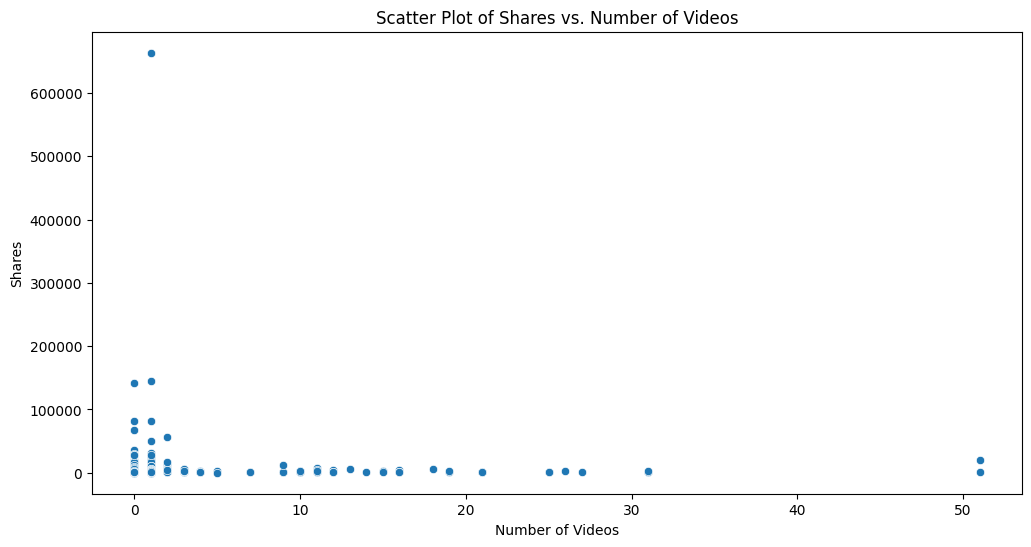

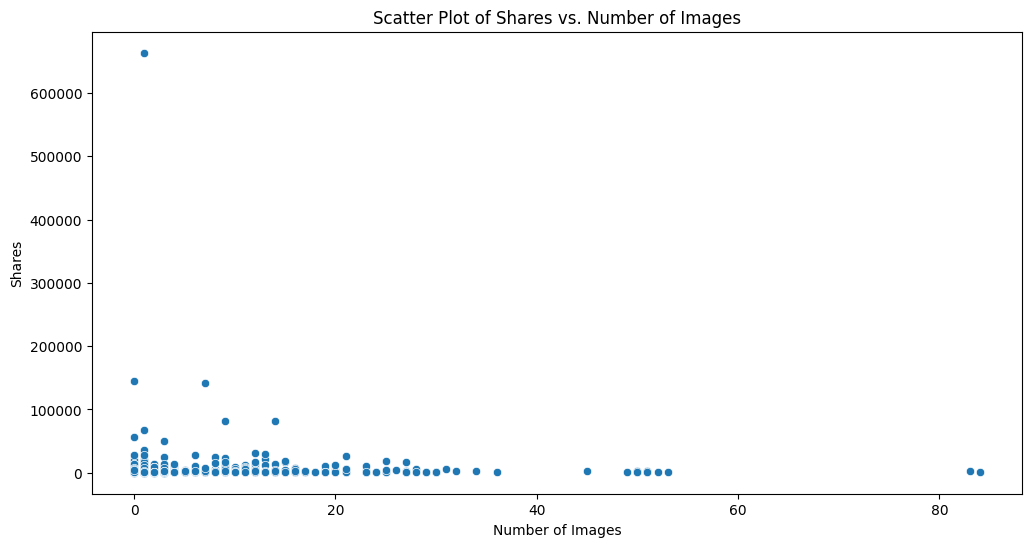

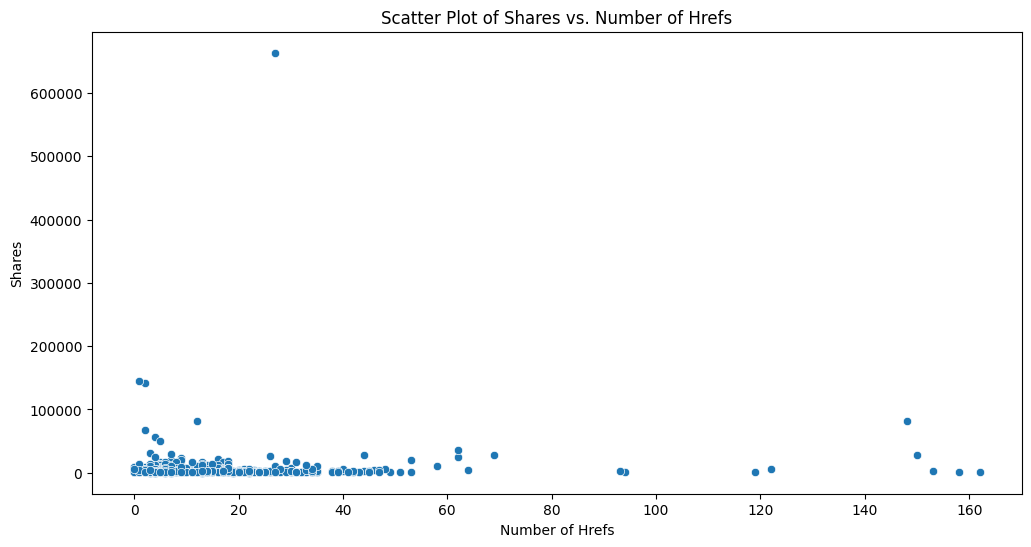

In [80]:

# Scatter plot of shares vs. num_videos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_videos', y='shares', data=df)
plt.title('Scatter Plot of Shares vs. Number of Videos')
plt.xlabel('Number of Videos')
plt.ylabel('Shares')
plt.show()

# Scatter plot of shares vs. num_imgs
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_imgs', y='shares', data=df)
plt.title('Scatter Plot of Shares vs. Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Shares')
plt.show()

# Scatter plot of shares vs. num_hrefs
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_hrefs', y='shares', data=df)
plt.title('Scatter Plot of Shares vs. Number of Hrefs')
plt.xlabel('Number of Hrefs')
plt.ylabel('Shares')
plt.show()


# Correlation of features

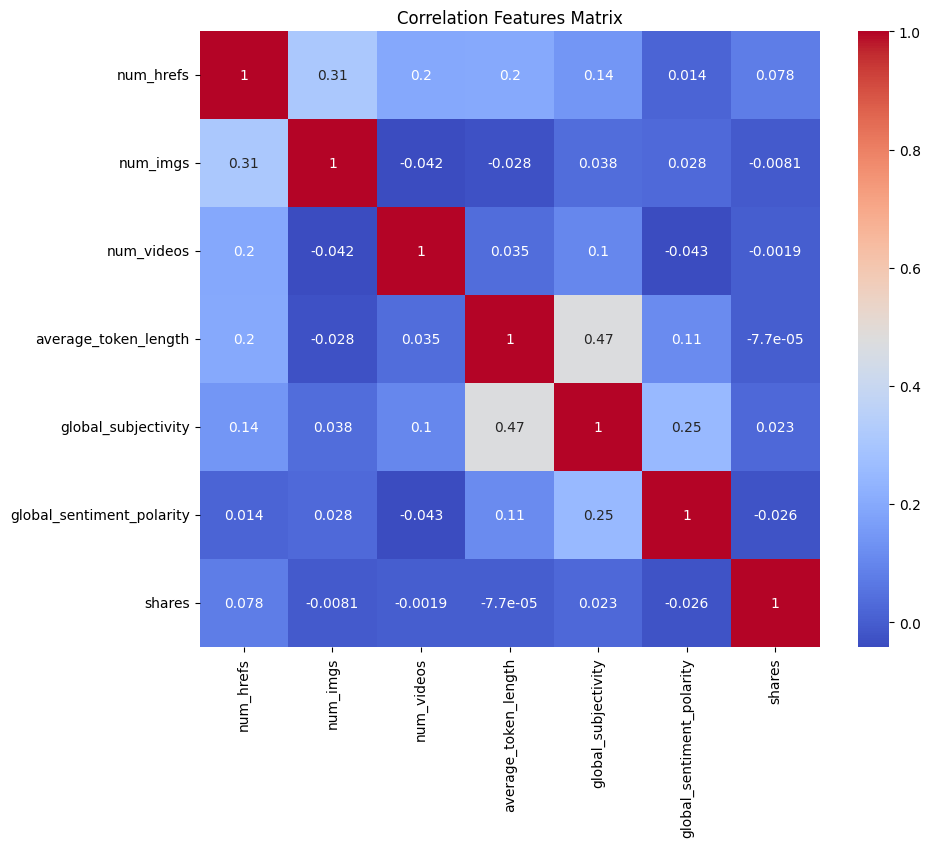

In [79]:
# Correlation matrix for selected features
selected_features = ['num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
                     'global_subjectivity', 'global_sentiment_polarity', 'shares']
correlation_matrix = df[selected_features].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Features Matrix')
plt.show()